# 3 - Machine Learning (ML)
*Processo de criação, treino, avaliação e validação de modelos*

Objetivo passa por criar um modelo preditivo que aprenda as relações entre os dados de entrada (features) e a variável alvo (Life expectancy) 

--- 

## 3.1 - Bibliotecas Utilizadas

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")


## 2.2 - Dataset Treino

In [67]:

df_teste = pd.read_csv('./data/Life_Expectancy_Clean.csv')

## 3.2 - Preparar os Dados (Divisão do Dataset)


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remover espaços das colunas para facilitar o uso
df_teste.columns = df_teste.columns.str.strip()

# Criar a função para visualização de colunas categóricas com gráfico de contagem
def count_plot(x_axis=None, y_axis=None, hue=None, rotation=0, top=None, data=None):
    """
    Visualiza a frequência de valores categóricos usando gráficos de contagem.
    
    Parâmetros:
    - x_axis (str): Nome da coluna a ser representada no eixo x.
    - y_axis (str): Nome da coluna a ser representada no eixo y.
    - hue (str): Coluna para adicionar diferenciação por cores.
    - rotation (int): Rotação dos rótulos no eixo x.
    - top (int): Número máximo de valores únicos a serem exibidos.
    - data (DataFrame): Conjunto de dados para visualização.

    Retorno:
    - Gráfico de contagem gerado com seaborn.
    """
    if x_axis:  # Visualizar no eixo x
        order = data[x_axis].value_counts().iloc[:top].index
    else:  # Visualizar no eixo y
        order = data[y_axis].value_counts().iloc[:top].index

    graph = sns.countplot(x=x_axis, y=y_axis, data=data, hue=hue, order=order)
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation=rotation)
    plt.show()

# Função definida e pronta para uso.
"Função de visualização de gráficos de contagem criada com sucesso."


'Função de visualização de gráficos de contagem criada com sucesso.'

In [69]:
# Criar a função para visualização de colunas categóricas usando gráfico de pizza
def pie_plot(column_name):
    """
    Visualiza a distribuição de valores categóricos com um gráfico de pizza.
    
    Parâmetros:
    - column_name (str): Nome da coluna (tipo de dado deve ser categórico ou discreto).
    
    Retorno:
    - Gráfico de pizza com porcentagens e rótulos.
    """
    plt.pie(data[column_name].value_counts(), 
            labels=data[column_name].value_counts().index, 
            shadow=True, autopct="%1.1f%%")
    plt.show()

# Função definida e pronta para uso.
"Função de visualização de gráficos de pizza criada com sucesso."


'Função de visualização de gráficos de pizza criada com sucesso.'

In [70]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treino e teste
train, test = train_test_split(df_teste, test_size=0.2, random_state=42)

# Exibir o tamanho dos conjuntos de treino e teste
train_shape = train.shape
test_shape = test.shape

train_shape, test_shape


((2350, 22), (588, 22))

In [71]:
# Exibir o tamanho dos conjuntos de treino e teste
print(f"Shape of train data is : {train.shape}")
print("-" * 30)
print(f"Shape of test data is : {test.shape}")


Shape of train data is : (2350, 22)
------------------------------
Shape of test data is : (588, 22)


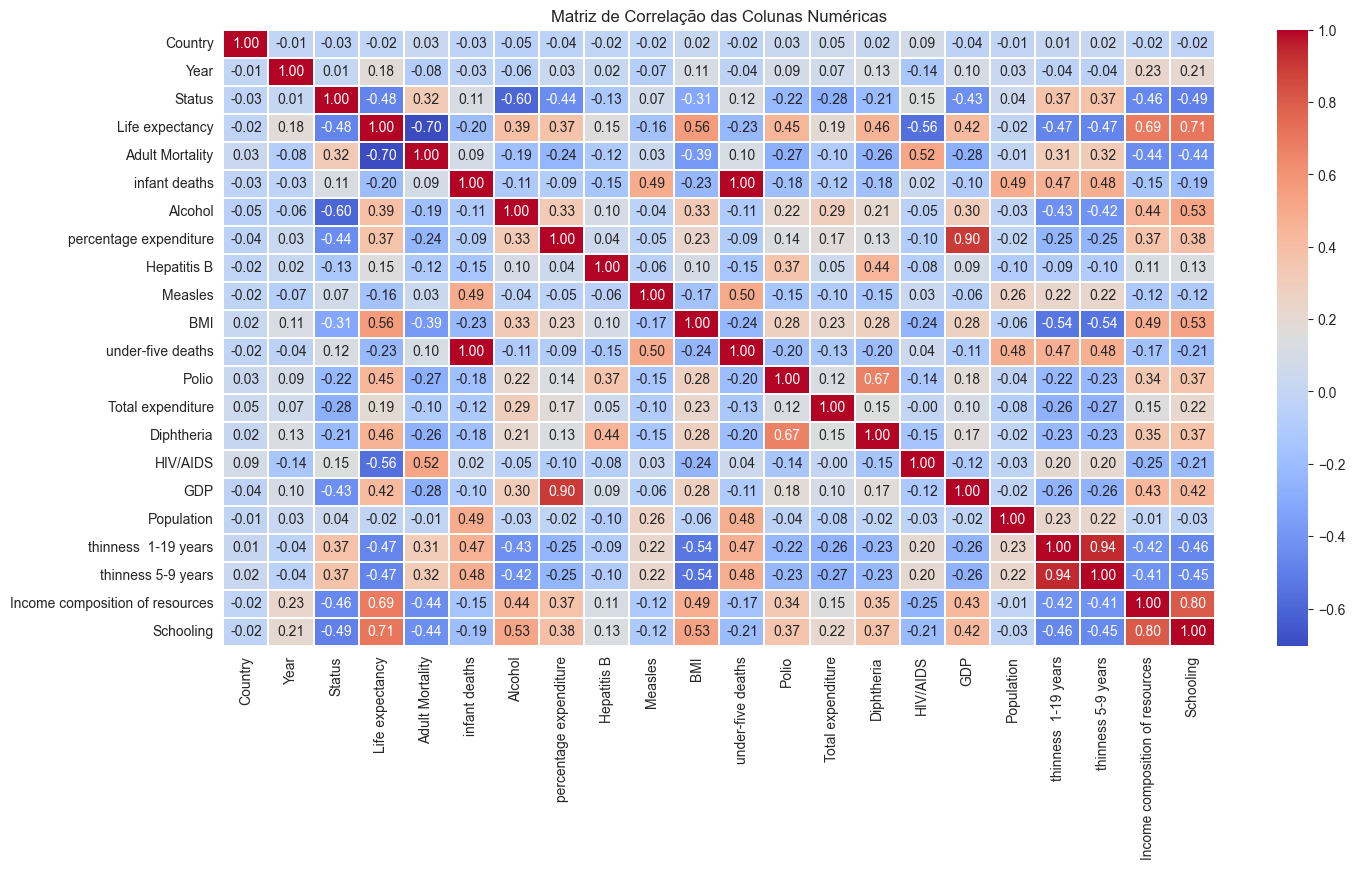

In [72]:
# Visualizar a matriz de correlação entre colunas numéricas
plt.figure(figsize=(16, 8))
sns.heatmap(train.select_dtypes(exclude='object').corr(), annot=True, fmt=".2f", linewidths=0.2, cmap='coolwarm')
plt.title("Matriz de Correlação das Colunas Numéricas")
plt.show()


## 3.3 - Treinar o Modelo

In [73]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Criar objeto do LabelEncoder
encoder = LabelEncoder()

# Aplicar codificação nas colunas categóricas
for column in ["Country", "Status"]:
    train[column] = encoder.fit_transform(train[column])
    test[column] = encoder.fit_transform(test[column])

# Codificação aplicada com sucesso.
"Codificação de colunas categóricas concluída."



'Codificação de colunas categóricas concluída.'

In [74]:
# see sample of training data

train.sample(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2657,173,2007,1,69.7,187.0,0,6.37,136.883668,89.0,0,...,9.0,4.82,88.0,0.7,1653.18440,13926.0,6.1,6.5,0.760,12.4
292,18,2011,1,68.3,225.0,0,0.23,289.852406,95.0,10,...,95.0,4.73,95.0,0.5,2458.45976,7451.0,16.3,17.0,0.572,11.9


In [75]:
# see sample of test data

test.sample(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1450,87,2007,0,78.0,221.0,0,12.12,170.988414,91.0,0,...,94.0,7.10,94.0,0.1,1444.158900,22325.0,2.4,2.4,0.814,16.2
407,24,2008,1,56.1,288.0,45,4.50,107.798834,93.0,395,...,92.0,6.77,93.0,1.5,569.761278,14689726.0,9.5,9.1,0.345,5.4


In [76]:
# Dividir o conjunto de treino em variáveis independentes (Train) e dependente (Target)
Train = train[['Hepatitis B', 'Polio', 'Diphtheria']]
Target = train["Life expectancy"]

# Verificar as dimensões das variáveis independentes e dependente
Train_shape = Train.shape
Target_shape = Target.shape

Train_shape, Target_shape


((2350, 3), (2350,))

In [77]:
# Dividir o conjunto de teste em variáveis independentes (x_test) e dependente (y_test)
x_test = test[['Hepatitis B', 'Polio', 'Diphtheria']]
y_test = test["Life expectancy"]

# Verificar as dimensões das variáveis independentes e dependente do conjunto de teste
x_test_shape = x_test.shape
y_test_shape = y_test.shape

x_test_shape, y_test_shape


((588, 3), (588,))

In [78]:
# Escalar os dados de treino e teste usando MinMaxScaler
scaler = MinMaxScaler()

Train = scaler.fit_transform(Train)
x_test = scaler.transform(x_test)

# Escalamento concluído com sucesso
"Os dados de treino e teste foram escalados com sucesso."


'Os dados de treino e teste foram escalados com sucesso.'

In [79]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Suponha que Train seja o conjunto de treino
scaler = MinMaxScaler()
scaler.fit(Train)  # Ajusta o scaler com base nos dados de treino

# Salve o scaler no arquivo .pkl
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [80]:
import numpy as np

# Criar um DataFrame vazio para armazenar os resultados dos modelos
Modeling = pd.DataFrame(columns=['Model', 'Training Score', 'Test R2 Score'])

# Definir a função para selecionar e avaliar modelos
def select_model(model_name):
    global Modeling  # Acessar o DataFrame global para armazenar os resultados
    
    # Inicializar o modelo
    model = model_name
    
    # Treinar o modelo com os dados de treino
    model.fit(Train, Target)
    
    # Calcular o score no conjunto de treino
    train_score = model.score(Train, Target)
    print(f"Score do modelo {model_name} nos dados de treino: {train_score}")
    
    # Fazer previsões no conjunto de teste
    predictions = np.round(model.predict(x_test), decimals=1)
    
    # Calcular o R² no conjunto de teste
    test_r2_score = r2_score(y_test, predictions)
    print(f"R² do modelo {model_name} nos dados de teste: {test_r2_score}")
    
    # Criar um DataFrame com os scores do modelo
    model_scores = pd.DataFrame({'Model': [str(model_name)],
                                 'Training Score': [train_score], 
                                 'Test R2 Score': [test_r2_score]})
    
    # Concatenar os resultados ao DataFrame Modeling
    Modeling = pd.concat([Modeling, model_scores], ignore_index=True)

# Função criada com sucesso.
"Função de avaliação de modelos definida com sucesso."

'Função de avaliação de modelos definida com sucesso.'

In [81]:
# Remover linhas com valores ausentes do conjunto de treino e teste
train = train.dropna()
test = test.dropna()

# Atualizar as variáveis independentes e dependentes após remoção
Train = train[['Hepatitis B', 'Polio', 'Diphtheria']]
Target = train["Life expectancy"]

x_test = test[['Hepatitis B', 'Polio', 'Diphtheria']]
y_test = test["Life expectancy"]

# Verificar o tamanho após a remoção
train_shape = train.shape
test_shape = test.shape

train_shape, test_shape


((1693, 22), (421, 22))

In [82]:
# Reavaliar os modelos após remoção de dados ausentes
select_model(LinearRegression())
select_model(SVR(C=9.0, epsilon=0.9, kernel='rbf'))
select_model(RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split=5))
select_model(GradientBoostingRegressor(n_estimators=100, max_depth=6, min_samples_split=5))



Score do modelo LinearRegression() nos dados de treino: 0.22359919152238827
R² do modelo LinearRegression() nos dados de teste: 0.32859827748660164
Score do modelo SVR(C=9.0, epsilon=0.9) nos dados de treino: 0.38385172058735095
R² do modelo SVR(C=9.0, epsilon=0.9) nos dados de teste: 0.49793751061549685
Score do modelo RandomForestRegressor(max_depth=7, min_samples_split=5) nos dados de treino: 0.5649361942202198
R² do modelo RandomForestRegressor(max_depth=7, min_samples_split=5) nos dados de teste: 0.5697444800892981
Score do modelo GradientBoostingRegressor(max_depth=6, min_samples_split=5) nos dados de treino: 0.7008845362596625
R² do modelo GradientBoostingRegressor(max_depth=6, min_samples_split=5) nos dados de teste: 0.5629421721059014


## 3.4 - Resultados 


   Training Score  Test R2 Score
0        0.223599       0.328598
1        0.383852       0.497938
2        0.564936       0.569744
3        0.700885       0.562942


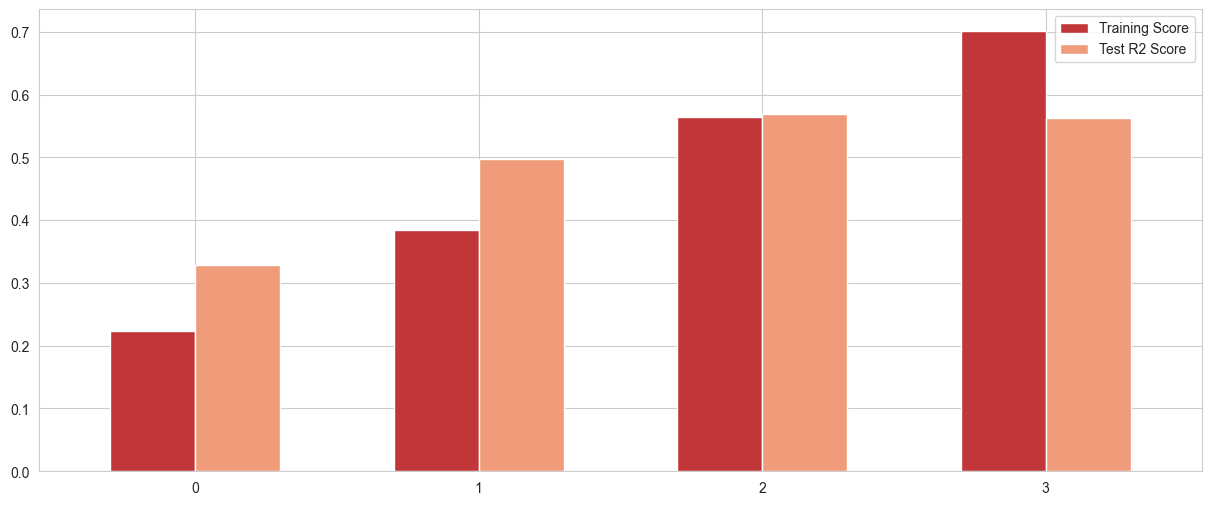

In [83]:
# Verificar e remover a coluna "Model" apenas se existir
if "Model" in Modeling.columns:
    Modeling.drop(columns="Model", inplace=True)

print(Modeling)  # Para exibir os dados diretamente

Modeling.plot(kind = "bar", figsize = (15,6), width = 0.6)
plt.xticks(rotation = 0)
plt.show()


In [84]:
# Guardar o DataFrame final com os resultados dos modelos em um arquivo CSV
output_path = './data/Life_Expectancy_Treino.csv'
Modeling.to_csv(output_path)

output_path


'./data/Life_Expectancy_Treino.csv'

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Suponha que o modelo esteja treinado
model = GradientBoostingRegressor()
# Treine o modelo e salve-o
joblib.dump(model, "life_expectancy_model.pkl")


['life_expectancy_model.pkl']

## 3.5 - Treino com H2o

In [86]:
# Importar Bibliotecas
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,19 mins 38 secs
H2O_cluster_timezone:,Europe/Lisbon
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_Avelino_rv3s83
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.803 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [87]:
#Dataset

data = h2o.import_file("./data/Life_Expectancy_Clean.csv")
print(data.columns)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [88]:
# Preparar os Dados:

target = "Life expectancy"
predictors = data.columns
predictors.remove(target)
data[target] = data[target]

In [89]:
#Dividir os Dados em Treino e Teste

train, test = data.split_frame([0.75], seed=42)

In [90]:
#Modelo Base (Distributed Random Forest):

from h2o.estimators import H2ORandomForestEstimator
model_default = H2ORandomForestEstimator(seed=42)
model_default.train(x=predictors, y=target, training_frame=train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1733497031234_4


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          803892                 20           20           20            1207          1331          1278.28

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3.5005611368180527
RMSE: 1.8709786574993454
MAE: 1.1718391702724107
RMSLE: 0.029189404940767844
Mean Residual Deviance: 3.5005611368180527

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2024-12-06 15:17:13  0.003 sec   0.0                nan                 nan                 nan
     2024-12-06 15:17:13  0.035 sec   1.0                3.1989835669725326  1.9785676871614504  10.233495861760307
     2024-12-06 15:17:13  0.064 sec   2.0                2.9455379656432092  1.8543872187422845  8.676193907045537
     2024-12-06 15:17:13  0.091 sec   3.0                2.8672569012029228  1.8024739828454444  8.221162137495787
     2024-12-06 15:17:13  0.117 sec   4.0                2.735746930872776   1.7263507424156872  7.4843112697798135
     2024-12-06 15:17:13  0.147 sec   5.0                2.642009825090494   1.674831863565918   6.980215915874703
     2024-12-06 15:17:13  0.183 sec   6.0                2.55687204257612    1.632105654480954   6.537594642107381
     2024-12-06 15:17:13  0.214 sec   7.0                2.4870112709019025  1.5860298073323016  6.185225061593096
     2024-12-06 15:17:13  0.247 sec   8.0                2.4313674714621327  1.5490774794433657  5.911547781284165
     2024-12-06 15:17:13  0.281 sec   9.0                2.355839113110331   1.5109028670219062  5.549977926860471
---  ---                  ---         ---                ---                 ---                 ---
     2024-12-06 15:17:14  1.251 sec   41.0               1.8907303784537466  1.182780736486806   3.5748613640078477
     2024-12-06 15:17:14  1.276 sec   42.0               1.889521346877015   1.1850160584256546  3.570290920303928
     2024-12-06 15:17:14  1.303 sec   43.0               1.890511367235946   1.186499304780803   3.5740332296483257
     2024-12-06 15:17:14  1.327 sec   44.0               1.8868828356422045  1.184977618549092   3.5603268354411663
     2024-12-06 15:17:14  1.353 sec   45.0               1.884145301858917   1.1844107071844021  3.550003518517029
     2024-12-06 15:17:14  1.375 sec   46.0               1.8786618488391849  1.1824739863665685  3.5293703422838645
     2024-12-06 15:17:14  1.401 sec   47.0               1.8764310889389164  1.1801023602224252  3.520993631536488
     2024-12-06 15:17:14  1.428 sec   48.0               1.8730831886532224  1.17763015166803    3.5084406316153234
     2024-12-06 15:17:14  1.455 sec   49.0               1.8740044332439134  1.1758119051865958  3.511892615817841
     2024-12-06 15:17:14  1.482 sec   50.0               1.8709786574993454  1.1718391702724107  3.5005611368180527
[51 rows x 7 columns]


Variable Importances: 
variable                         relative_importance    scaled_importance      percentage
-------------------------------  ---------------------  ---------------------  ---------------------
HIV/AIDS                         3122120.25             1.0                    0.37885427128700283
Income composition of resources  1454568.375            0.46589120806605705    0.17650487413088745
Adult Mortality                  1454043.875            0.46572321325547916    0.17644122857934597
Schooling   

In [91]:
# Avaliar o Modelo

performance_default = model_default.model_performance(test)
print(performance_default)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 3.249822191377633
RMSE: 1.802726321818604
MAE: 1.0992174400100914
RMSLE: 0.027636875820045304
Mean Residual Deviance: 3.249822191377633


In [92]:
#Treinar Modelos com Configurações Diferentes:

model_alt1 = H2ORandomForestEstimator(ntrees=100, max_depth=20, seed=42)
model_alt1.train(x=predictors, y=target, training_frame=train)

model_alt2 = H2ORandomForestEstimator(ntrees=150, max_depth=30, seed=42)
model_alt2.train(x=predictors, y=target, training_frame=train)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1733497031234_6


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    150                150                         2.43244e+06            19           30           23.5867       1134          1345          1289.14

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3.1967618489428995
RMSE: 1.7879490621779188
MAE: 1.1006414166766183
RMSLE: 0.027958396414130334
Mean Residual Deviance: 3.1967618489428995

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2024-12-06 15:17:30  0.002 sec   0.0                nan                 nan                 nan
     2024-12-06 15:17:30  0.035 sec   1.0                3.1987071353586036  1.9797824897202365  10.231727337794045
     2024-12-06 15:17:30  0.059 sec   2.0                2.9454628593924648  1.855270557963283   8.675751456060436
     2024-12-06 15:17:30  0.085 sec   3.0                2.867261154509208   1.8032544928860952  8.221186528157478
     2024-12-06 15:17:30  0.108 sec   4.0                2.7359118986951416  1.7275299449580799  7.485213917421654
     2024-12-06 15:17:30  0.134 sec   5.0                2.6421116027245013  1.6757393905888622  6.980753721251434
     2024-12-06 15:17:30  0.159 sec   6.0                2.556763353174191   1.6325881100054311  6.537038844134532
     2024-12-06 15:17:30  0.184 sec   7.0                2.4868095685399663  1.5866783637755757  6.184221830181934
     2024-12-06 15:17:30  0.211 sec   8.0                2.431467990105566   1.5500098182999105  5.912036586908001
     2024-12-06 15:17:30  0.236 sec   9.0                2.3554900984390987  1.5113438687554601  5.548333603844636
---  ---                  ---         ---                ---                 ---                 ---
     2024-12-06 15:17:33  3.802 sec   136.0              1.7928802313151146  1.1005373559654936  3.214419523840539
     2024-12-06 15:17:33  3.829 sec   137.0              1.7942498331608554  1.1012337555484253  3.219332463797757
     2024-12-06 15:17:33  3.854 sec   138.0              1.7926667592898087  1.100038069901558   3.213654109862625
     2024-12-06 15:17:33  3.878 sec   139.0              1.7927062363543753  1.1006836301942322  3.213795649863869
     2024-12-06 15:17:34  3.901 sec   140.0              1.7925288422390215  1.1009776974934196  3.213159650258767
     2024-12-06 15:17:34  3.923 sec   141.0              1.7911688761102382  1.1008459876228325  3.208285942746014
     2024-12-06 15:17:34  3.946 sec   142.0              1.7902138756637647  1.1014168055203037  3.2048657206190767
     2024-12-06 15:17:34  3.970 sec   143.0              1.790173052117395   1.101683234595162   3.2047195565273094
     2024-12-06 15:17:34  3.998 sec   144.0              1.7920082313969081  1.102342760277438   3.211293501394275
     2024-12-06 15:17:34  4.134 sec   150.0              1.7879490621779188  1.1006414166766183  3.1967618489428995
[146 rows x 7 columns]


Variable Importances: 
variable                         relative_importance    scaled_importance      percentage
-------------------------------  ---------------------  ---------------------  ---------------------
HIV/AIDS                         8810344.0              1.0                    0.35701892183033607
Income composition of resources  4985612.5              0.565881706775581      0.20203047683652833
Adult Mortality                  3995262.25             0.45347403574707185    0.16189881132047085
Schooling      

In [93]:
# Comparação dos Modelos:

performance_alt1 = model_alt1.model_performance(test)
performance_alt2 = model_alt2.model_performance(test)
print(performance_alt1)
print(performance_alt2)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 3.2605883458787095
RMSE: 1.8057099284986804
MAE: 1.1024163535115508
RMSLE: 0.02770079148852694
Mean Residual Deviance: 3.2605883458787095
ModelMetricsRegression: drf
** Reported on test data. **

MSE: 3.2840285503340008
RMSE: 1.8121888837353575
MAE: 1.0991922911419636
RMSLE: 0.027834467928132108
Mean Residual Deviance: 3.2840285503340008
